<a href="https://colab.research.google.com/github/tahayusab/DSA210-Project/blob/main/project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Mounted at /content/drive


In [3]:
import pandas as pd
from google.colab import drive
drive.mount("/content/drive", force_remount=True)



Mounted at /content/drive


In [4]:
import pandas as pd

# List of your CSV filenames
file_names = [
    'Neighbors_Homosexuals.csv',
    'Neighbors_Immigrantsforeign_workers.csv',
    'Neighbors_People_of_a_different_race.csv',
    'Neighbors_People_of_a_different_religion.csv',
    'Neighbors_People_who_speak_a_different_language.csv'
]

# Common path to the CSVs
base_path = '/content/drive/My Drive/Colab Notebooks/DSA 210/Project/'

# Dictionary to hold the cleaned DataFrames
dataframes = {}

# Expected column names (excluding dummy index)
column_names = [
    'Country',
    'Mentioned (%)',
    'Not Mentioned (%)',
    "Don't Know (%)",
    'No Answer (%)',
    'Other Missing (%)',
    'Sample Size (N)'
]

# Function to load and clean each CSV
def load_and_clean_csv(file_path):
    df = pd.read_csv(file_path, sep=",", skiprows=7, header=None)

    if df.shape[1] == 8:
        df.columns = ['Index'] + column_names
        df = df.drop(columns=['Index'])  # Drop dummy index
    elif df.shape[1] == 7:
        df.columns = column_names
    else:
        raise ValueError(f"Unexpected number of columns in file: {file_path}")

    df['Country'] = df['Country'].str.strip()  # Clean country names

    # Clean and convert percentages to float
    percent_cols = df.columns[1:-1]
    for col in percent_cols:
        df[col] = df[col].astype(str).str.replace('%', '', regex=False).astype(float)

    # Convert sample size to Int
    df['Sample Size (N)'] = pd.to_numeric(df['Sample Size (N)'], errors='coerce').astype('Int64')

    # Remove TOTAL or empty rows
    df = df[df['Country'].notna() & (df['Country'] != 'TOTAL')]

    return df

# Load and clean each file
for file in file_names:
    full_path = f"{base_path}/{file}"
    key = file.replace('.csv', '')  # use filename without extension as key
    dataframes[key] = load_and_clean_csv(full_path)

# Print first few rows of each cleaned DataFrame
for name, df in dataframes.items():
    print(f"\n=== {name} ===")
    print(df.head(6))



=== Neighbors_Homosexuals ===
      Country  Mentioned (%)  Not Mentioned (%)  Don't Know (%)  \
0     Albania           75.7               23.2             0.9   
1     Andorra            5.2               94.8             0.0   
2  Azerbaijan           85.8               11.3             2.2   
3   Argentina            8.6               91.4             0.0   
4   Australia           11.8               88.2             0.0   
5     Austria           10.6               85.9             1.0   

   No Answer (%)  Other Missing (%)  Sample Size (N)  
0            0.2                0.0             1454  
1            0.0                0.0             1004  
2            0.7                0.0             1817  
3            0.0                0.0             1003  
4            0.0                0.0             1813  
5            2.5                0.0             1651  

=== Neighbors_Immigrantsforeign_workers ===
      Country  Mentioned (%)  Not Mentioned (%)  Don't Know (%)  \
0 

In [5]:
import pandas as pd

happiness_df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/DSA 210/Project/World Happiness Report.csv')


# Display basic info and first few rows
print("World Happiness Report Dataset:")

print(happiness_df.head())

# Drop rows with missing values (if any)
happiness_df.dropna(inplace=True)

# Optional: Display the number of unique countries and regions
print(f"Total unique countries: {happiness_df['Country'].nunique()}")
print(f"Regions in dataset: {happiness_df['Region'].unique()}")

# Save cleaned version if needed
happiness_df.to_csv('Cleaned_Happiness.csv', index=False)


World Happiness Report Dataset:
       Country  Happiness Rank  Happiness Score   Economy    Family    Health  \
0       Norway               1            7.537  1.616463  1.533524  0.796667   
1      Denmark               2            7.522  1.482383  1.551122  0.792566   
2      Iceland               3            7.504  1.480633  1.610574  0.833552   
3  Switzerland               4            7.494  1.564980  1.516912  0.858131   
4      Finland               5            7.469  1.443572  1.540247  0.809158   

    Freedom  Generosity  Corruption  Dystopia  Job Satisfaction  \
0  0.635423    0.362012    0.315964  2.277027              94.6   
1  0.626007    0.355280    0.400770  2.313707              93.5   
2  0.627163    0.475540    0.153527  2.322715              94.5   
3  0.620071    0.290549    0.367007  2.276716              93.7   
4  0.617951    0.245483    0.382612  2.430182              91.2   

           Region  
0  Western Europe  
1  Western Europe  
2  Western Europe 

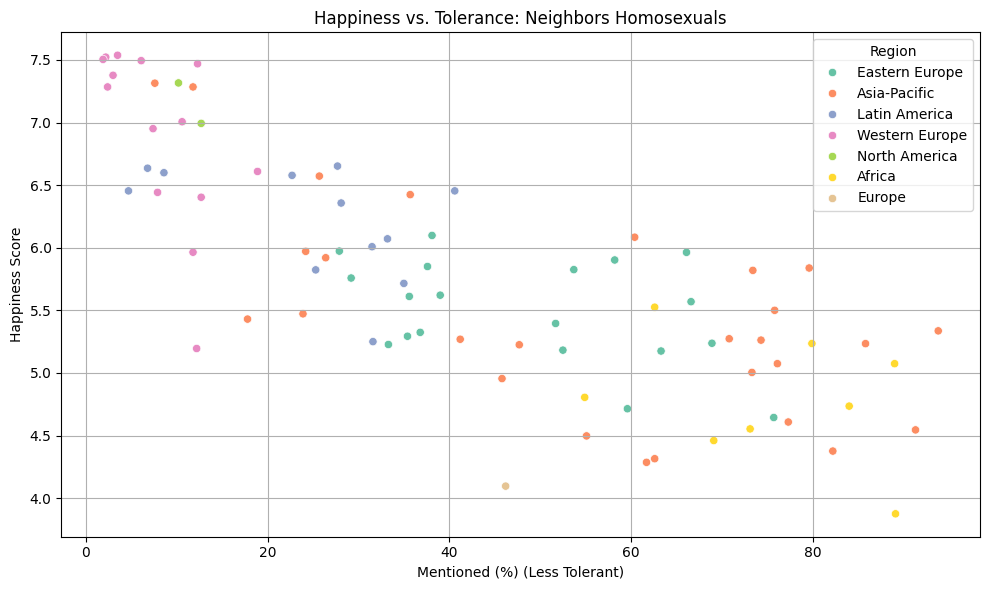

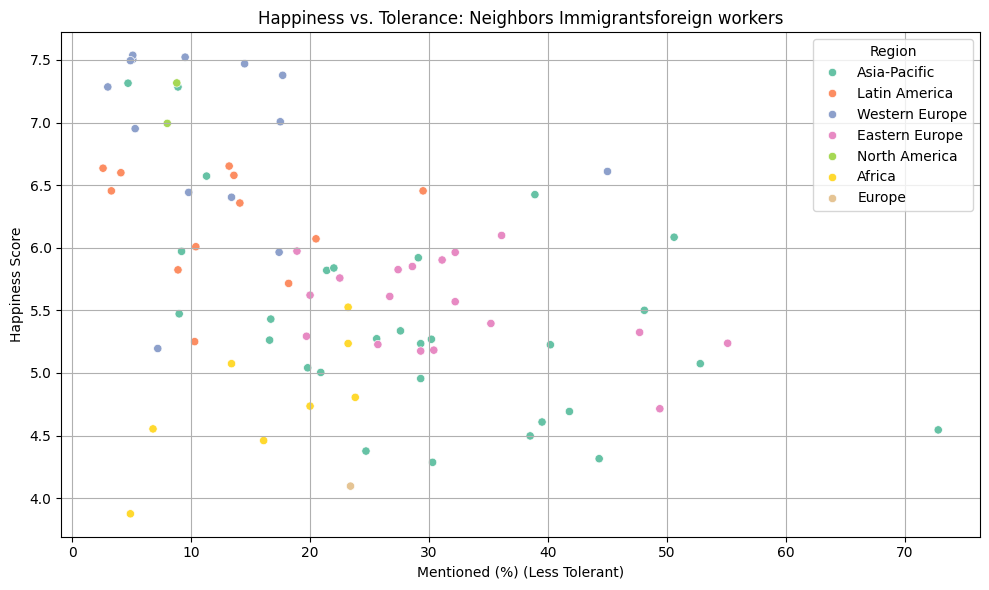

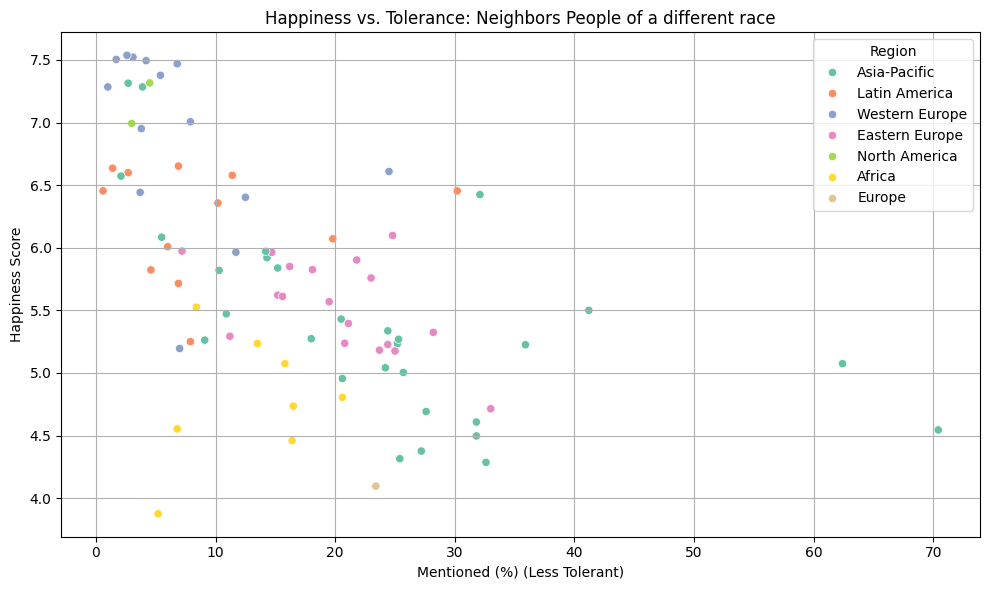

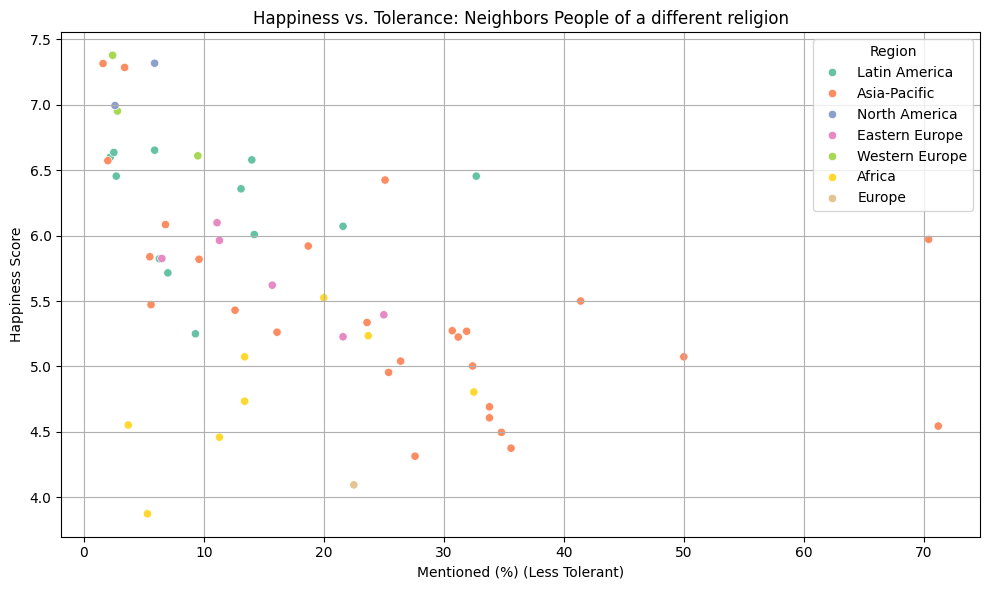

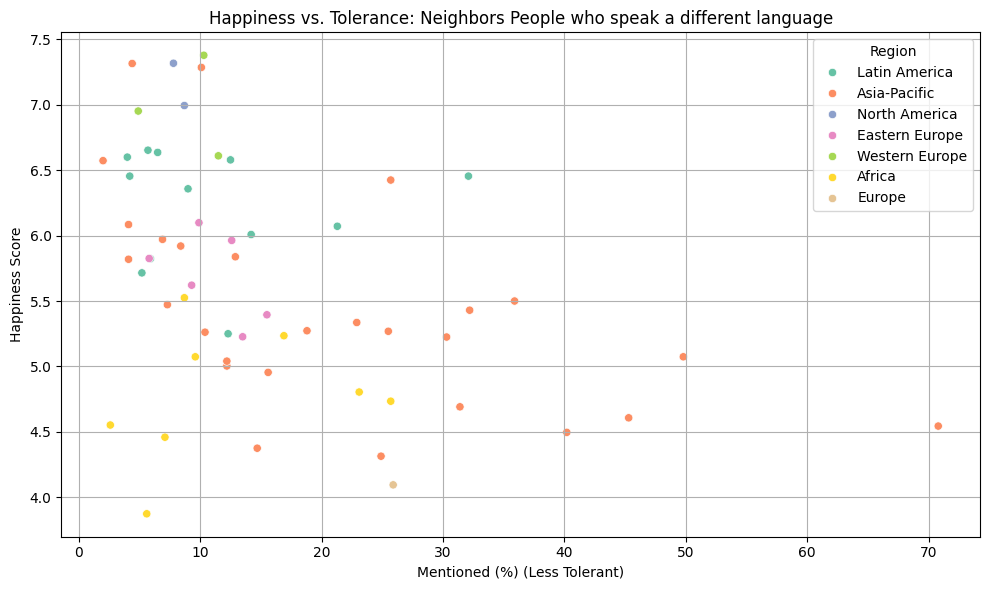

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Load cleaned happiness data
happiness_df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/DSA 210/Project/World Happiness Report.csv')

# Clean Country names again just in case
happiness_df['Country'] = happiness_df['Country'].str.strip()

# Loop through each racism-related dataframe
for name, df in dataframes.items():
    merged = pd.merge(df, happiness_df, on='Country')

    # Plot
    plt.figure(figsize=(10, 6))
    sns.scatterplot(
        data=merged,
        x='Mentioned (%)',
        y='Happiness Score',
        hue='Region',
        palette='Set2'
    )

    plt.title(f'Happiness vs. Tolerance: {name.replace("_", " ")}')
    plt.xlabel('Mentioned (%) (Less Tolerant)')
    plt.ylabel('Happiness Score')
    plt.grid(True)
    plt.tight_layout()
    plt.show()


       Happiness
count  57.000000
mean    5.678877
std     0.880282
min     3.875000
25%     5.074000
50%     5.621000
75%     6.424000
max     7.377000


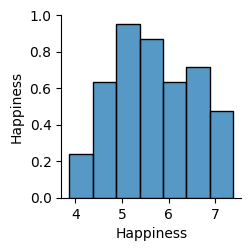


Pearson Correlation Matrix:
             Happiness  Homosexuals  Immigrants      Race  Religion  Language
Happiness     1.000000    -0.757158   -0.352847 -0.472572 -0.462492 -0.429314
Homosexuals  -0.757158     1.000000    0.473617  0.490177  0.427180  0.402089
Immigrants   -0.352847     0.473617    1.000000  0.841288  0.624333  0.730712
Race         -0.472572     0.490177    0.841288  1.000000  0.797665  0.888190
Religion     -0.462492     0.427180    0.624333  0.797665  1.000000  0.732580
Language     -0.429314     0.402089    0.730712  0.888190  0.732580  1.000000

Spearman Correlation Matrix:
             Happiness  Homosexuals  Immigrants      Race  Religion  Language
Happiness     1.000000    -0.758431   -0.376619 -0.563886 -0.585535 -0.459851
Homosexuals  -0.758431     1.000000    0.514763  0.551009  0.547912  0.411632
Immigrants   -0.376619     0.514763    1.000000  0.841564  0.706539  0.669368
Race         -0.563886     0.551009    0.841564  1.000000  0.847460  0.816524
Relig

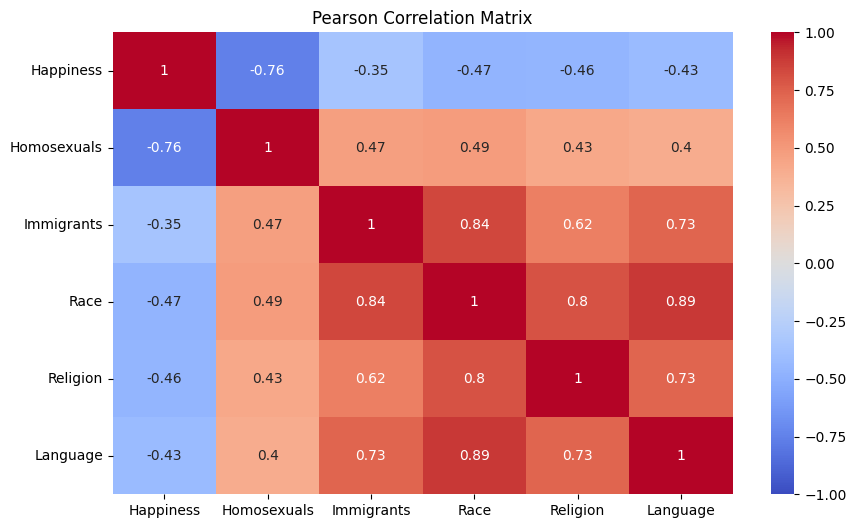

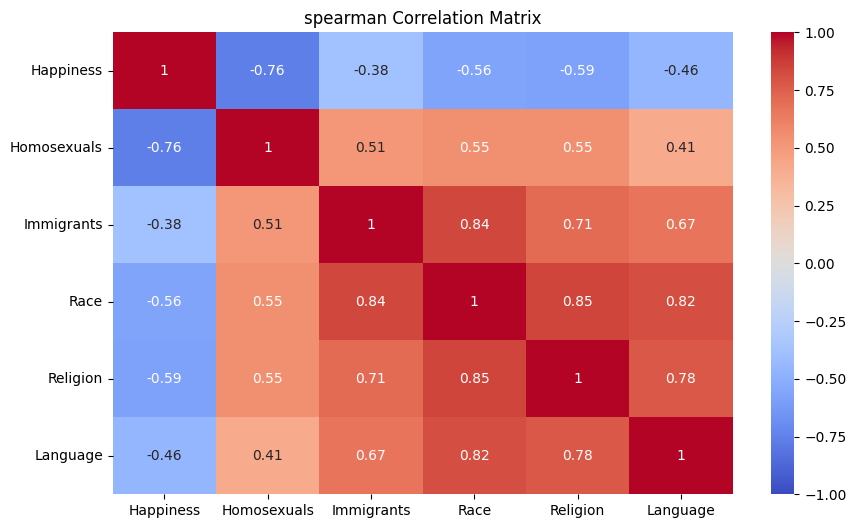

In [13]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr, spearmanr, ttest_ind

# Step 1: Load Data
# Load World Happiness Index data
happiness_df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/DSA 210/Project/World Happiness Report.csv')

# Load racism-related datasets with skiprows
homosexuals_df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/DSA 210/Project/Neighbors_Homosexuals.csv', skiprows=5)
immigrants_df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/DSA 210/Project/Neighbors_Immigrantsforeign_workers.csv', skiprows=4)
race_df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/DSA 210/Project/Neighbors_People_of_a_different_race.csv', skiprows=4)
religion_df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/DSA 210/Project/Neighbors_People_of_a_different_religion.csv', skiprows=4)
language_df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/DSA 210/Project/Neighbors_People_who_speak_a_different_language.csv', skiprows=4)

# Rename columns for consistency
for df in [homosexuals_df, immigrants_df, race_df, religion_df, language_df]:
    df.rename(columns={df.columns[0]: 'Country', 'Mentioned (%)': 'Mentioned'}, inplace=True)
    df['Country'] = df['Country'].str.strip()

# Step 2: Clean and Merge Data
happiness_df['Country'] = happiness_df['Country'].str.strip()
merged_df = happiness_df[['Country', 'Happiness Score']].copy()
merged_df = merged_df.merge(homosexuals_df[['Country', 'Mentioned']], on='Country', how='left')
merged_df = merged_df.merge(immigrants_df[['Country', 'Mentioned']], on='Country', how='left', suffixes=('', '_Immigrants'))
merged_df = merged_df.merge(race_df[['Country', 'Mentioned']], on='Country', how='left')
merged_df = merged_df.merge(religion_df[['Country', 'Mentioned']], on='Country', how='left', suffixes=('', '_Religion'))
merged_df = merged_df.merge(language_df[['Country', 'Mentioned']], on='Country', how='left', suffixes=('', '_Language'))

# Rename columns clearly
merged_df.columns = ['Country', 'Happiness', 'Homosexuals', 'Immigrants', 'Race', 'Religion', 'Language']

# Drop rows with missing values
merged_df = merged_df.dropna()

# Step 3: Exploratory Data Analysis
print(merged_df.describe())

# Pairplot visualization
sns.pairplot(merged_df[['Happiness', 'Homosexuals', 'Immigrants', 'Race', 'Religion', 'Language']])
plt.show()

# Step 4: Correlation Analysis
pearson_corr = merged_df.drop(columns='Country').corr(method='pearson')
spearman_corr = merged_df.drop(columns='Country').corr(method='spearman')


print("\nPearson Correlation Matrix:")
print(pearson_corr)

print("\nSpearman Correlation Matrix:")
print(spearman_corr)

# Step 5: Hypothesis Testing - T-test
high_happiness = merged_df[merged_df['Happiness'] > merged_df['Happiness'].median()]
low_happiness = merged_df[merged_df['Happiness'] <= merged_df['Happiness'].median()]
# Convert relevant columns to numeric (coerce errors into NaN)
for col in ['Homosexuals', 'Immigrants', 'Race', 'Religion', 'Language']:
    merged_df[col] = pd.to_numeric(merged_df[col], errors='coerce')



# Step 6: Visualize Correlation Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(pearson_corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Pearson Correlation Matrix")
plt.show()

plt.figure(figsize=(10, 6))
sns.heatmap(spearman_corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("spearman Correlation Matrix")
plt.show()


In [14]:
# Load all racism-related datasets correctly
homosexuals_df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/DSA 210/Project/Neighbors_Homosexuals.csv', skiprows=5)
immigrants_df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/DSA 210/Project/Neighbors_Immigrantsforeign_workers.csv', skiprows=4)
race_df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/DSA 210/Project/Neighbors_People_of_a_different_race.csv', skiprows=4)
religion_df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/DSA 210/Project/Neighbors_People_of_a_different_religion.csv', skiprows=4)
language_df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/DSA 210/Project/Neighbors_People_who_speak_a_different_language.csv', skiprows=4)
print("Homosexuals columns:", homosexuals_df.columns.tolist())
print("Immigrants columns:", immigrants_df.columns.tolist())
print("Race columns:", race_df.columns.tolist())
print("Religion columns:", religion_df.columns.tolist())
print("Language columns:", language_df.columns.tolist())


Homosexuals columns: ['Country', 'Mentioned', 'Not mentioned', "Don't know", 'No answer', 'Other missing; Multiple answers Mail (EVS) ', '(N)']
Immigrants columns: ['Country', 'Mentioned', 'Not mentioned', "Don't know", 'No answer', 'Other missing; Multiple answers Mail (EVS) ', '(N)']
Race columns: ['Country', 'Mentioned', 'Not mentioned', "Don't know", 'No answer', 'Other missing; Multiple answers Mail (EVS) ', '(N)']
Religion columns: ['Country', 'Mentioned', 'Not mentioned', "Don't know", 'No answer', 'Missing; Not available', '(N)']
Language columns: ['Country', 'Mentioned', 'Not mentioned', "Don't know", 'No answer', 'Missing; Not available', '(N)']


In [15]:
import pandas as pd
import scipy.stats as stats

# Load the cleaned happiness data
happiness_df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/DSA 210/Project/World Happiness Report.csv')

# Clean the 'Country' column to match with the racism datasets
happiness_df['Country'] = happiness_df['Country'].str.strip()

# Load the racism-related datasets with skiprows
homosexuals_df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/DSA 210/Project/Neighbors_Homosexuals.csv', skiprows=5)
immigrants_df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/DSA 210/Project/Neighbors_Immigrantsforeign_workers.csv', skiprows=4)
race_df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/DSA 210/Project/Neighbors_People_of_a_different_race.csv', skiprows=4)
religion_df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/DSA 210/Project/Neighbors_People_of_a_different_religion.csv', skiprows=4)
language_df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/DSA 210/Project/Neighbors_People_who_speak_a_different_language.csv', skiprows=4)

# Merge the datasets with happiness data
merged_df = happiness_df[['Country', 'Happiness Score']].copy()

# Merge each racism dataset with happiness data
merged_df = merged_df.merge(homosexuals_df[['Country', 'Mentioned']], on='Country', how='left')
merged_df = merged_df.merge(immigrants_df[['Country', 'Mentioned']], on='Country', how='left', suffixes=('', '_Immigrants'))
merged_df = merged_df.merge(race_df[['Country', 'Mentioned']], on='Country', how='left', suffixes=('', '_Race'))
merged_df = merged_df.merge(religion_df[['Country', 'Mentioned']], on='Country', how='left', suffixes=('', '_Religion'))
merged_df = merged_df.merge(language_df[['Country', 'Mentioned']], on='Country', how='left', suffixes=('', '_Language'))

# Rename the columns for clarity
merged_df.columns = ['Country', 'Happiness', 'Homosexuals', 'Immigrants', 'Race', 'Religion', 'Language']

# Step 1: Check for missing values and handle them (if necessary)
merged_df.fillna(0, inplace=True)

# Step 2: Convert the 'Mentioned' columns to numeric, coercing errors to NaN and filling them with 0
merged_df['Homosexuals'] = pd.to_numeric(merged_df['Homosexuals'], errors='coerce').fillna(0)
merged_df['Immigrants'] = pd.to_numeric(merged_df['Immigrants'], errors='coerce').fillna(0)
merged_df['Race'] = pd.to_numeric(merged_df['Race'], errors='coerce').fillna(0)
merged_df['Religion'] = pd.to_numeric(merged_df['Religion'], errors='coerce').fillna(0)
merged_df['Language'] = pd.to_numeric(merged_df['Language'], errors='coerce').fillna(0)

# Step 3: Correlation Analysis (Pearson)
pearson_corr_homosexuals = merged_df['Homosexuals'].corr(merged_df['Happiness'])
pearson_corr_immigrants = merged_df['Immigrants'].corr(merged_df['Happiness'])
pearson_corr_race = merged_df['Race'].corr(merged_df['Happiness'])
pearson_corr_religion = merged_df['Religion'].corr(merged_df['Happiness'])
pearson_corr_language = merged_df['Language'].corr(merged_df['Happiness'])

# Display Pearson correlation results
print(f"Pearson Correlation for 'Homosexuals' with Happiness Score: {pearson_corr_homosexuals:.4f}")
print(f"Pearson Correlation for 'Immigrants' with Happiness Score: {pearson_corr_immigrants:.4f}")
print(f"Pearson Correlation for 'Race' with Happiness Score: {pearson_corr_race:.4f}")
print(f"Pearson Correlation for 'Religion' with Happiness Score: {pearson_corr_religion:.4f}")
print(f"Pearson Correlation for 'Language' with Happiness Score: {pearson_corr_language:.4f}")

# Step 4: Hypothesis Testing (T-test for difference in means)
# Split data based on median happiness scores
high_happiness = merged_df[merged_df['Happiness'] > merged_df['Happiness'].median()]
low_happiness = merged_df[merged_df['Happiness'] <= merged_df['Happiness'].median()]

# T-test for 'Homosexuals'
t_stat_homosexuals, p_value_homosexuals = stats.ttest_ind(high_happiness['Homosexuals'], low_happiness['Homosexuals'])
print(f"\nT-test for 'Homosexuals' between high and low happiness countries: t-stat = {t_stat_homosexuals:.4f}, p = {p_value_homosexuals:.4f}")
if p_value_homosexuals < 0.05:
    print("H₀ should be rejected: There is a significant relationship between racism against homosexuals and happiness.")
else:
    print("H₀ should not be rejected: No significant relationship between racism against homosexuals and happiness.")

# T-test for 'Immigrants'
t_stat_immigrants, p_value_immigrants = stats.ttest_ind(high_happiness['Immigrants'], low_happiness['Immigrants'])
print(f"T-test for 'Immigrants' between high and low happiness countries: t-stat = {t_stat_immigrants:.4f}, p = {p_value_immigrants:.4f}")
if p_value_immigrants < 0.05:
    print("H₀ should be rejected: There is a significant relationship between racism against immigrants and happiness.")
else:
    print("H₀ should not be rejected: No significant relationship between racism against immigrants and happiness.")

# T-test for 'Race'
t_stat_race, p_value_race = stats.ttest_ind(high_happiness['Race'], low_happiness['Race'])
print(f"T-test for 'Race' between high and low happiness countries: t-stat = {t_stat_race:.4f}, p = {p_value_race:.4f}")
if p_value_race < 0.05:
    print("H₀ should be rejected: There is a significant relationship between racism against people of a different race and happiness.")
else:
    print("H₀ should not be rejected: No significant relationship between racism against people of a different race and happiness.")

# T-test for 'Religion'
t_stat_religion, p_value_religion = stats.ttest_ind(high_happiness['Religion'], low_happiness['Religion'])
print(f"T-test for 'Religion' between high and low happiness countries: t-stat = {t_stat_religion:.4f}, p = {p_value_religion:.4f}")
if p_value_religion < 0.05:
    print("H₀ should be rejected: There is a significant relationship between racism against people of a different religion and happiness.")
else:
    print("H₀ should not be rejected: No significant relationship between racism against people of a different religion and happiness.")

# T-test for 'Language'
t_stat_language, p_value_language = stats.ttest_ind(high_happiness['Language'], low_happiness['Language'])
print(f"T-test for 'Language' between high and low happiness countries: t-stat = {t_stat_language:.4f}, p = {p_value_language:.4f}")
if p_value_language < 0.05:
    print("H₀ should be rejected: There is a significant relationship between racism against people who speak a different language and happiness.")
else:
    print("H₀ should not be rejected: No significant relationship between racism against people who speak a different language and happiness.")


Pearson Correlation for 'Homosexuals' with Happiness Score: -0.0247
Pearson Correlation for 'Immigrants' with Happiness Score: 0.0997
Pearson Correlation for 'Race' with Happiness Score: 0.0092
Pearson Correlation for 'Religion' with Happiness Score: -0.0193
Pearson Correlation for 'Language' with Happiness Score: -0.0046

T-test for 'Homosexuals' between high and low happiness countries: t-stat = -0.8936, p = 0.3729
H₀ should not be rejected: No significant relationship between racism against homosexuals and happiness.
T-test for 'Immigrants' between high and low happiness countries: t-stat = 0.6831, p = 0.4956
H₀ should not be rejected: No significant relationship between racism against immigrants and happiness.
T-test for 'Race' between high and low happiness countries: t-stat = -0.7269, p = 0.4684
H₀ should not be rejected: No significant relationship between racism against people of a different race and happiness.
T-test for 'Religion' between high and low happiness countries: t-s


Permutation Test for 'Homosexuals' with Happiness:
Actual correlation = -0.1184
P-value from permutation test = 0.4626
H₀ should not be rejected: No statistically significant correlation.


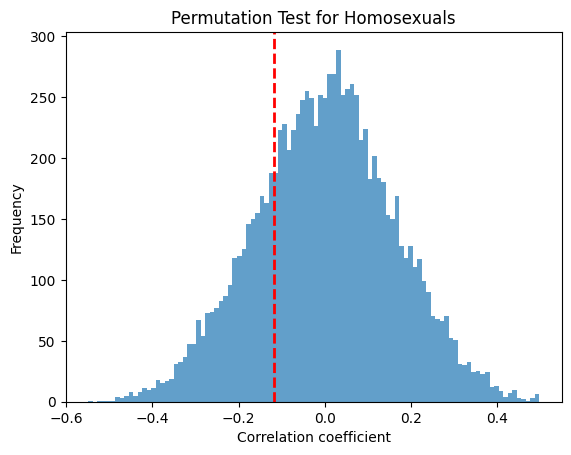


Permutation Test for 'Immigrants' with Happiness:
Actual correlation = 0.1361
P-value from permutation test = 0.4053
H₀ should not be rejected: No statistically significant correlation.


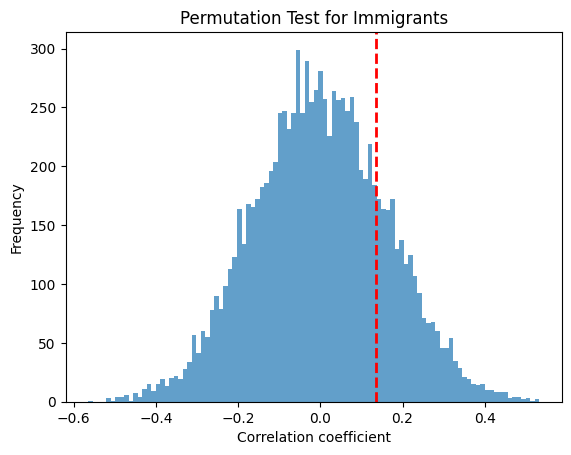


Permutation Test for 'Race' with Happiness:
Actual correlation = 0.0668
P-value from permutation test = 0.6824
H₀ should not be rejected: No statistically significant correlation.


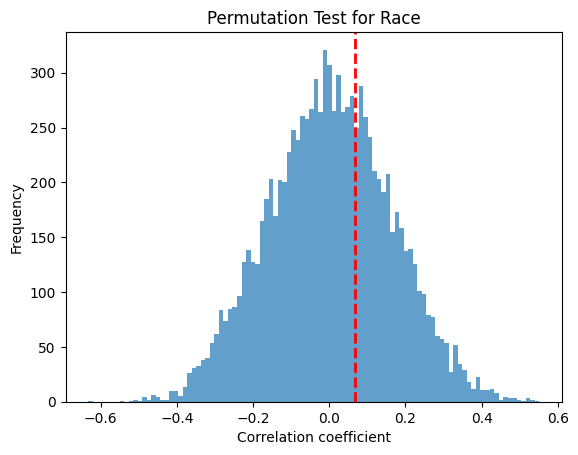


Permutation Test for 'Religion' with Happiness:
Actual correlation = 0.0268
P-value from permutation test = 0.8735
H₀ should not be rejected: No statistically significant correlation.


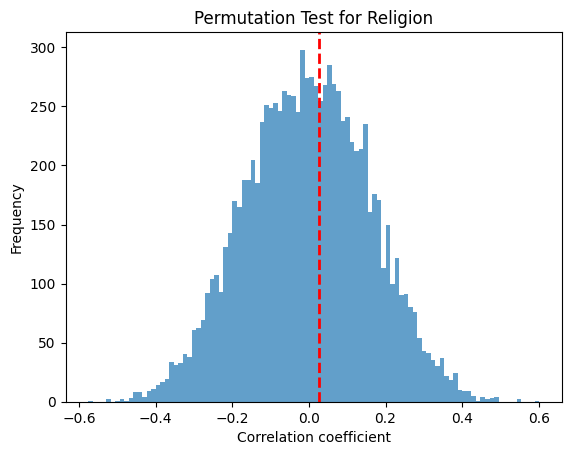


Permutation Test for 'Language' with Happiness:
Actual correlation = 0.0218
P-value from permutation test = 0.8935
H₀ should not be rejected: No statistically significant correlation.


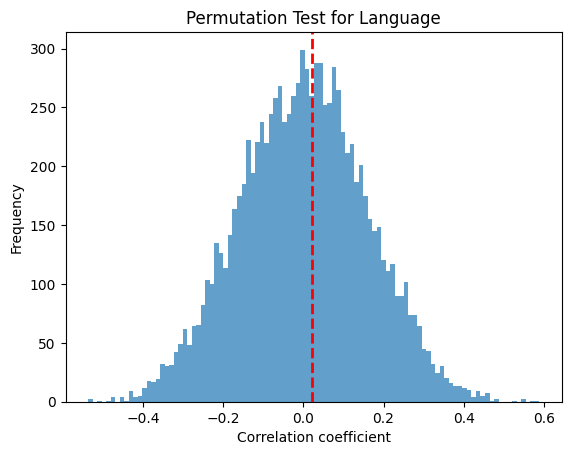

In [18]:
import numpy as np
import matplotlib.pyplot as plt

# Set seed for reproducibility
np.random.seed(42)

# Step 1: Randomly choose 40 countries
sample_df = merged_df.sample(n=40, random_state=42).copy()

# Function to perform permutation test
def permutation_test(x, y, num_permutations=10000):
    actual_corr = np.corrcoef(x, y)[0, 1]
    count = 0
    corrs = []

    for _ in range(num_permutations):
        shuffled_y = np.random.permutation(y)
        corr = np.corrcoef(x, shuffled_y)[0, 1]
        corrs.append(corr)
        if abs(corr) >= abs(actual_corr):
            count += 1

    p_value = count / num_permutations

    return actual_corr, p_value, corrs

# Apply permutation test for each racism category
for col in ['Homosexuals', 'Immigrants', 'Race', 'Religion', 'Language']:
    actual_corr, p_val, rand_corrs = permutation_test(sample_df[col], sample_df['Happiness'])

    print(f"\nPermutation Test for '{col}' with Happiness:")
    print(f"Actual correlation = {actual_corr:.4f}")
    print(f"P-value from permutation test = {p_val:.4f}")
    if p_val < 0.05:
        print("H₀ should be rejected: There is a statistically significant correlation.")
    else:
        print("H₀ should not be rejected: No statistically significant correlation.")

    # Optional: Plot histogram of permutation results
    plt.hist(rand_corrs, bins=100, alpha=0.7)
    plt.axvline(actual_corr, color='red', linestyle='dashed', linewidth=2)
    plt.title(f"Permutation Test for {col}")
    plt.xlabel('Correlation coefficient')
    plt.ylabel('Frequency')
    plt.show()


In [19]:
import pandas as pd
from scipy.stats import pearsonr

# Assumes `merged_df` already contains the following columns:
# 'Happiness', 'Homosexuals', 'Immigrants', 'Race', 'Religion', 'Language'

# Revised hypothesis testing: Hₐ is "negative correlation"

features = ['Homosexuals', 'Immigrants', 'Race', 'Religion', 'Language']

print("Hypothesis Testing (Revised Hₐ: Negative correlation):\n")
for feature in features:
    corr_coef, p_value = pearsonr(merged_df[feature], merged_df['Happiness'])

    print(f"{feature}:")
    print(f"  Pearson correlation = {corr_coef:.4f}, p-value = {p_value:.4f}")

    if p_value < 0.05:
        if corr_coef < 0:
            print("  ✅ H₀ rejected: Significant **negative** correlation between racism and happiness.")
        else:
            print("  ❌ H₀ rejected, but correlation is **positive** (does not support Hₐ).")
    else:
        print("  🔸 H₀ **not rejected**: No significant correlation.\n")

    print()


Hypothesis Testing (Revised Hₐ: Negative correlation):

Homosexuals:
  Pearson correlation = -0.0247, p-value = 0.7617
  🔸 H₀ **not rejected**: No significant correlation.


Immigrants:
  Pearson correlation = 0.0997, p-value = 0.2201
  🔸 H₀ **not rejected**: No significant correlation.


Race:
  Pearson correlation = 0.0092, p-value = 0.9101
  🔸 H₀ **not rejected**: No significant correlation.


Religion:
  Pearson correlation = -0.0193, p-value = 0.8125
  🔸 H₀ **not rejected**: No significant correlation.


Language:
  Pearson correlation = -0.0046, p-value = 0.9553
  🔸 H₀ **not rejected**: No significant correlation.




       Happiness  Homosexuals  Immigrants       Race   Religion   Language
count  57.000000    57.000000   57.000000  57.000000  57.000000  57.000000
mean    5.678877    46.168421   22.768421  17.115789  18.222807  15.847368
std     0.880282    26.896622   14.653597  13.756346  15.617195  13.337127
min     3.875000     3.000000    2.600000   0.600000   1.600000   2.000000
25%     5.074000    25.300000   10.400000   6.800000   5.900000   6.900000
50%     5.621000    41.200000   20.900000  15.200000  13.400000  11.500000
75%     6.424000    73.100000   29.500000  24.400000  25.400000  22.900000
max     7.377000    93.800000   72.800000  70.400000  71.200000  70.800000


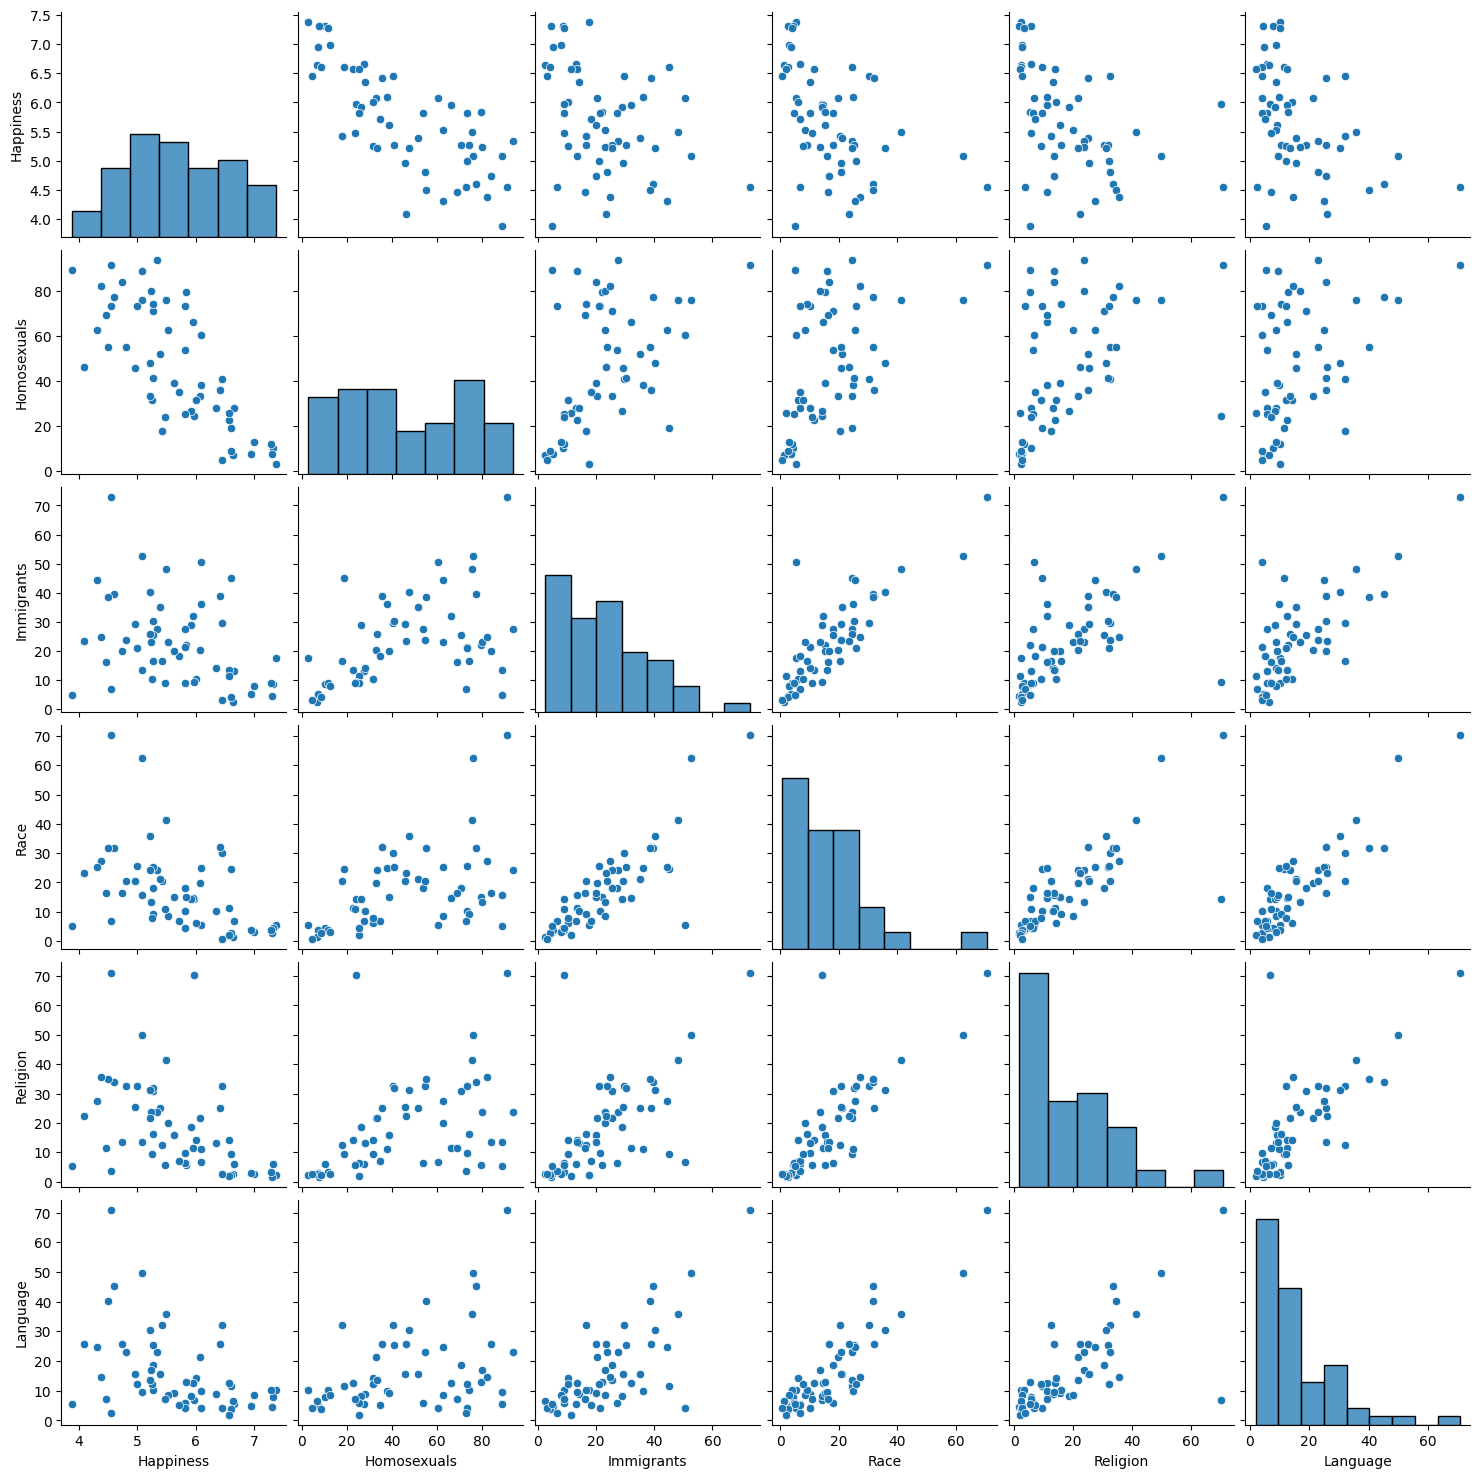


Pearson Correlation Matrix:
             Happiness  Homosexuals  Immigrants      Race  Religion  Language
Happiness     1.000000    -0.757158   -0.352847 -0.472572 -0.462492 -0.429314
Homosexuals  -0.757158     1.000000    0.473617  0.490177  0.427180  0.402089
Immigrants   -0.352847     0.473617    1.000000  0.841288  0.624333  0.730712
Race         -0.472572     0.490177    0.841288  1.000000  0.797665  0.888190
Religion     -0.462492     0.427180    0.624333  0.797665  1.000000  0.732580
Language     -0.429314     0.402089    0.730712  0.888190  0.732580  1.000000

Spearman Correlation Matrix:
             Happiness  Homosexuals  Immigrants      Race  Religion  Language
Happiness     1.000000    -0.758431   -0.376619 -0.563886 -0.585535 -0.459851
Homosexuals  -0.758431     1.000000    0.514763  0.551009  0.547912  0.411632
Immigrants   -0.376619     0.514763    1.000000  0.841564  0.706539  0.669368
Race         -0.563886     0.551009    0.841564  1.000000  0.847460  0.816524
Relig

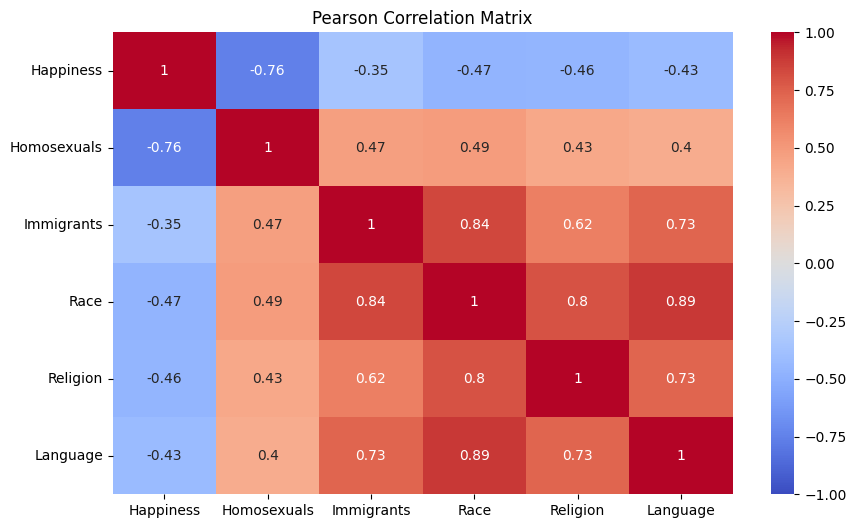

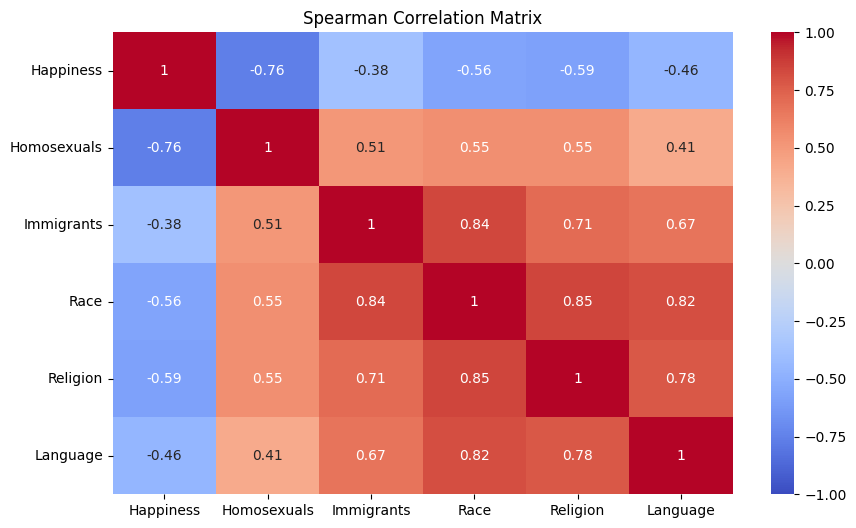


Hypothesis Testing (H₀: No correlation, Hₐ: Positive correlation between racism and happiness):

Homosexuals:
  Observed correlation = -0.7572
  Traditional p-value = 0.0000
  Permutation test p-value = 1.0000
  ❌ H₀ rejected, but correlation is negative (contradicts Hₐ).



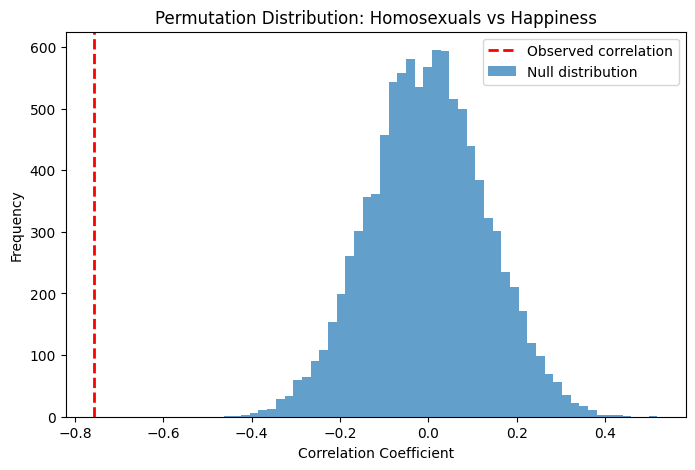

Immigrants:
  Observed correlation = -0.3528
  Traditional p-value = 0.0071
  Permutation test p-value = 0.9956
  ❌ H₀ rejected, but correlation is negative (contradicts Hₐ).



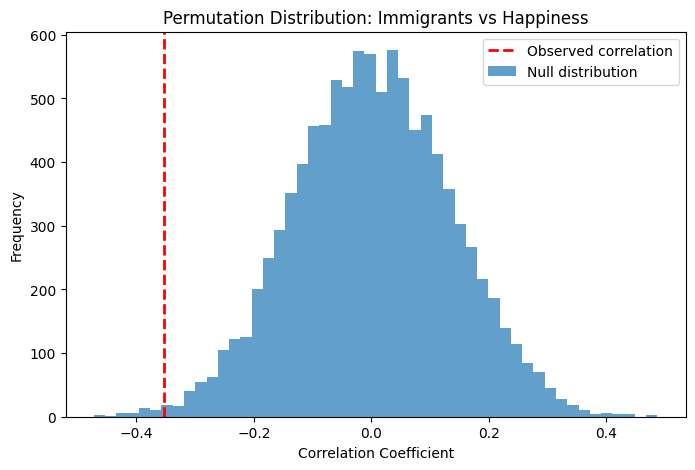

Race:
  Observed correlation = -0.4726
  Traditional p-value = 0.0002
  Permutation test p-value = 1.0000
  ❌ H₀ rejected, but correlation is negative (contradicts Hₐ).



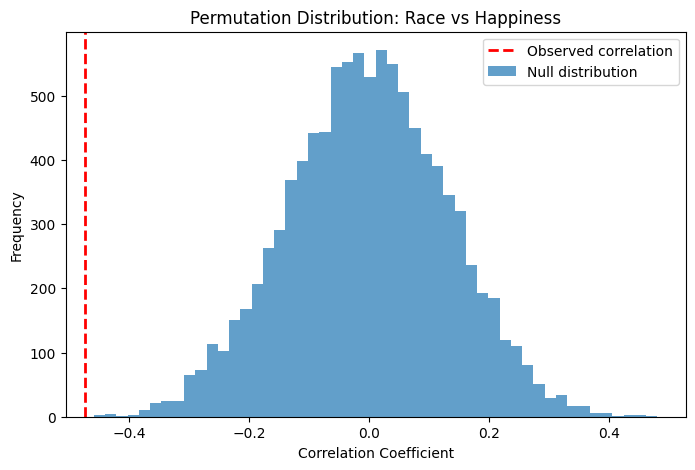

Religion:
  Observed correlation = -0.4625
  Traditional p-value = 0.0003
  Permutation test p-value = 1.0000
  ❌ H₀ rejected, but correlation is negative (contradicts Hₐ).



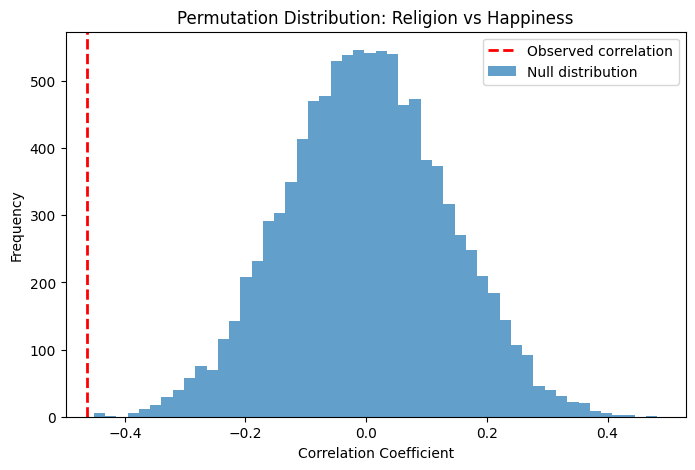

Language:
  Observed correlation = -0.4293
  Traditional p-value = 0.0009
  Permutation test p-value = 0.9997
  ❌ H₀ rejected, but correlation is negative (contradicts Hₐ).



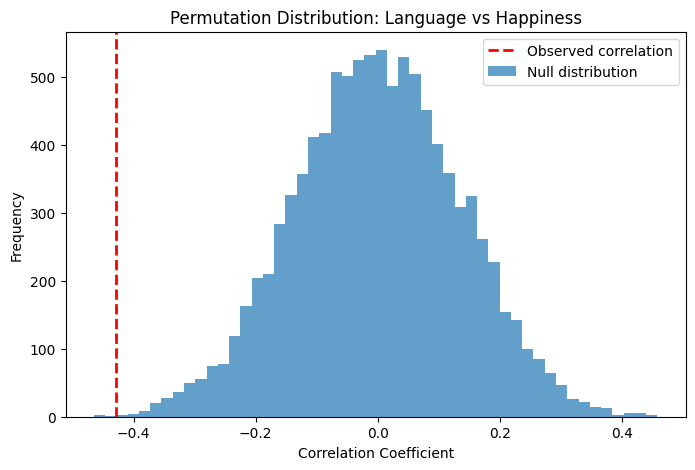

In [3]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr, spearmanr, ttest_ind

# Step 1: Load Data
# Load World Happiness Index data
happiness_df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/DSA 210/Project/World Happiness Report.csv')

# Load racism-related datasets with skiprows
homosexuals_df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/DSA 210/Project/Neighbors_Homosexuals.csv', skiprows=5)
immigrants_df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/DSA 210/Project/Neighbors_Immigrantsforeign_workers.csv', skiprows=4)
race_df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/DSA 210/Project/Neighbors_People_of_a_different_race.csv', skiprows=4)
religion_df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/DSA 210/Project/Neighbors_People_of_a_different_religion.csv', skiprows=4)
language_df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/DSA 210/Project/Neighbors_People_who_speak_a_different_language.csv', skiprows=4)

# Rename columns for consistency
for df in [homosexuals_df, immigrants_df, race_df, religion_df, language_df]:
    df.rename(columns={df.columns[0]: 'Country', 'Mentioned (%)': 'Mentioned'}, inplace=True)
    df['Country'] = df['Country'].str.strip()

# Step 2: Clean and Merge Data
happiness_df['Country'] = happiness_df['Country'].str.strip()
merged_df = happiness_df[['Country', 'Happiness Score']].copy()
merged_df = merged_df.merge(homosexuals_df[['Country', 'Mentioned']], on='Country', how='left')
merged_df = merged_df.merge(immigrants_df[['Country', 'Mentioned']], on='Country', how='left', suffixes=('', '_Immigrants'))
merged_df = merged_df.merge(race_df[['Country', 'Mentioned']], on='Country', how='left')
merged_df = merged_df.merge(religion_df[['Country', 'Mentioned']], on='Country', how='left', suffixes=('', '_Religion'))
merged_df = merged_df.merge(language_df[['Country', 'Mentioned']], on='Country', how='left', suffixes=('', '_Language'))

# Rename columns clearly
merged_df.columns = ['Country', 'Happiness', 'Homosexuals', 'Immigrants', 'Race', 'Religion', 'Language']

# Drop rows with missing values
merged_df = merged_df.dropna()

# Convert relevant columns to numeric (coerce errors into NaN)
for col in ['Homosexuals', 'Immigrants', 'Race', 'Religion', 'Language']:
    merged_df[col] = pd.to_numeric(merged_df[col], errors='coerce')

# Step 3: Exploratory Data Analysis
print(merged_df.describe())

# Pairplot visualization
sns.pairplot(merged_df[['Happiness', 'Homosexuals', 'Immigrants', 'Race', 'Religion', 'Language']])
plt.show()

# Step 4: Correlation Analysis
pearson_corr = merged_df.drop(columns='Country').corr(method='pearson')
spearman_corr = merged_df.drop(columns='Country').corr(method='spearman')

print("\nPearson Correlation Matrix:")
print(pearson_corr)

print("\nSpearman Correlation Matrix:")
print(spearman_corr)

# Step 5: Visualize Correlation Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(pearson_corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Pearson Correlation Matrix")
plt.show()

plt.figure(figsize=(10, 6))
sns.heatmap(spearman_corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Spearman Correlation Matrix")
plt.show()

# Step 6: Randomization Test for Hypothesis Testing
features = ['Homosexuals', 'Immigrants', 'Race', 'Religion', 'Language']

# Number of permutations for randomization test
n_permutations = 10000

print("\nHypothesis Testing (H₀: No correlation, Hₐ: Positive correlation between racism and happiness):\n")

for feature in features:
    # Get observed correlation
    observed_corr, p_value_pearson = pearsonr(merged_df[feature], merged_df['Happiness'])

    # Randomization test
    permuted_corrs = []
    for i in range(n_permutations):
        # Shuffle happiness values to break any potential relationship
        permuted_happiness = np.random.permutation(merged_df['Happiness'])
        perm_corr, _ = pearsonr(merged_df[feature], permuted_happiness)
        permuted_corrs.append(perm_corr)

    # Calculate p-value from permutation test
    # For one-sided test (Hₐ: positive correlation),
    # count values greater than or equal to observed
    p_value_perm = np.mean([corr >= observed_corr for corr in permuted_corrs])

    print(f"{feature}:")
    print(f"  Observed correlation = {observed_corr:.4f}")
    print(f"  Traditional p-value = {p_value_pearson:.4f}")
    print(f"  Permutation test p-value = {p_value_perm:.4f}")

    # Decision based on permutation test p-value
    if p_value_pearson < 0.05:
        if observed_corr > 0:
            print("  ✅ H₀ rejected: Significant positive correlation between this variable and happiness.")
            print("     This supports your alternative hypothesis.")
        else:
            print("  ❌ H₀ rejected, but correlation is negative (contradicts Hₐ).")
    else:
        print("  🔸 H₀ not rejected: No significant evidence for correlation.")

    print()

    # Plot histogram of permutation distribution
    plt.figure(figsize=(8, 5))
    plt.hist(permuted_corrs, bins=50, alpha=0.7)
    plt.axvline(observed_corr, color='red', linestyle='--', linewidth=2)
    plt.title(f'Permutation Distribution: {feature} vs Happiness')
    plt.xlabel('Correlation Coefficient')
    plt.ylabel('Frequency')
    plt.legend(['Observed correlation', 'Null distribution'])
    plt.savefig(f'permutation_test_{feature}.png')
    plt.show()